In [1]:
%pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("D:\MSAIM\trimister-2 msaiml\Adv-Machine_learning\DATASETS\Stock_datasets", path)

<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10048\143045677.py:6: SyntaxWarning: invalid escape sequence '\M'
  print("D:\MSAIM\trimister-2 msaiml\Adv-Machine_learning\DATASETS\Stock_datasets", path)


D:\MSAIM	rimister-2 msaiml\Adv-Machine_learning\DATASETS\Stock_datasets C:\Users\ASUS\.cache\kagglehub\datasets\yasserh\housing-prices-dataset\versions\1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
df = pd.read_csv("DATASETS\House_datasets\Housing.csv")
df.head()

<>:8: SyntaxWarning: invalid escape sequence '\H'
<>:8: SyntaxWarning: invalid escape sequence '\H'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10048\127647591.py:8: SyntaxWarning: invalid escape sequence '\H'
  df = pd.read_csv("DATASETS\House_datasets\Housing.csv")


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print('shape',df.shape)

shape (545, 13)


In [5]:
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


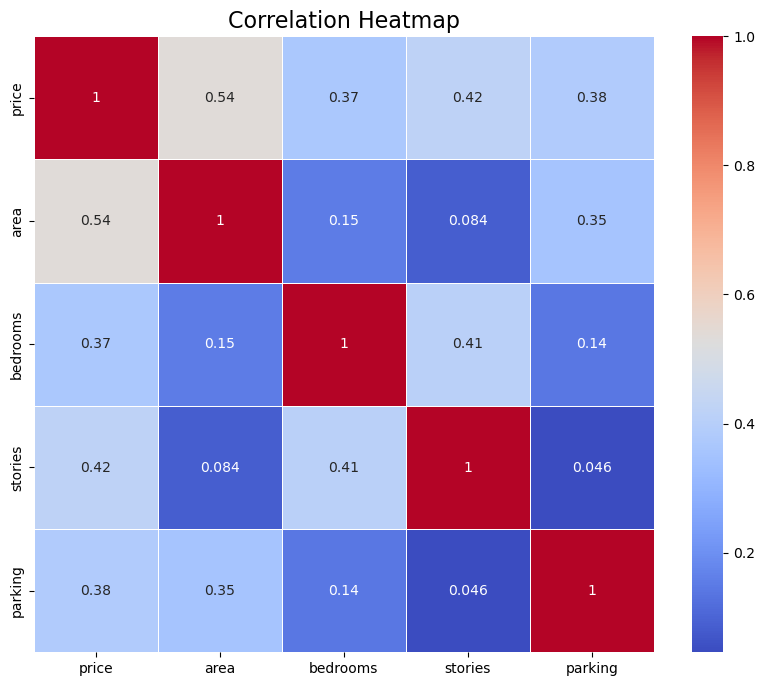

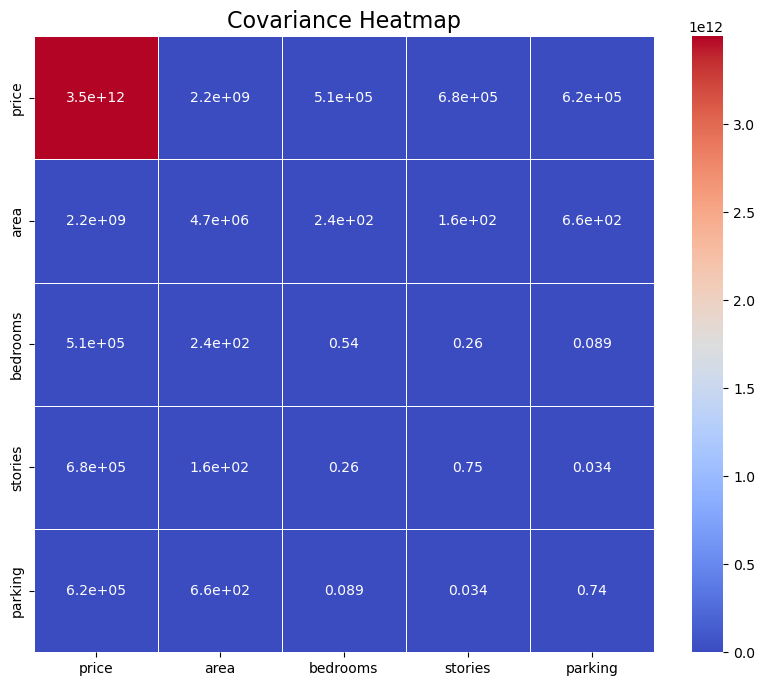

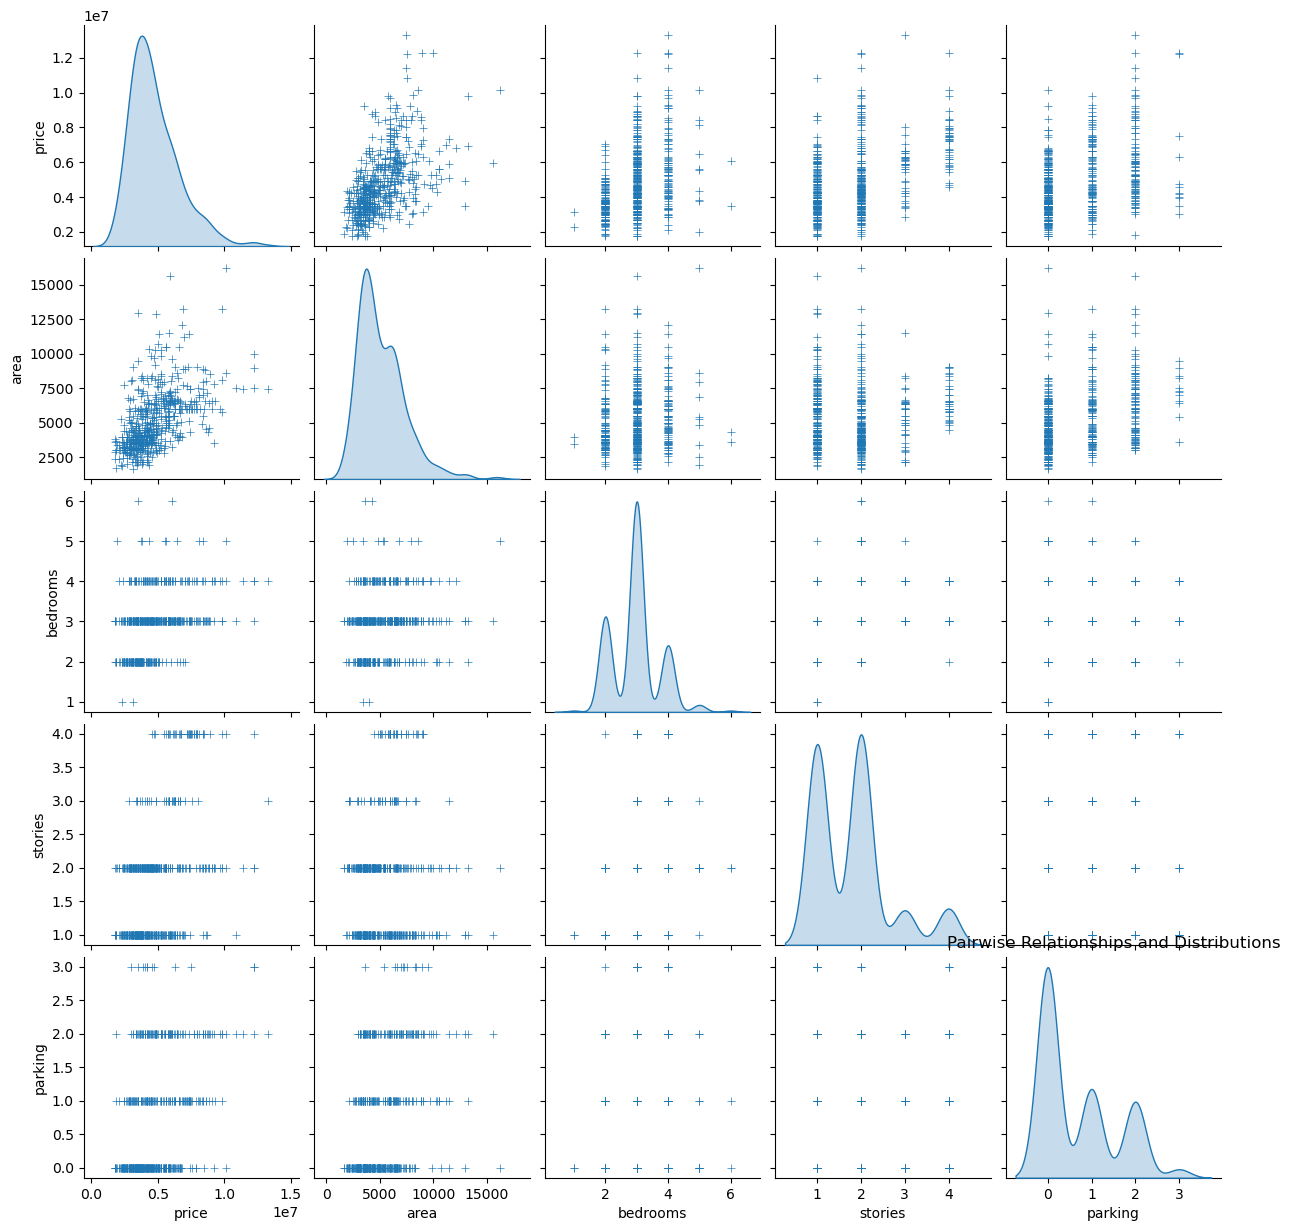

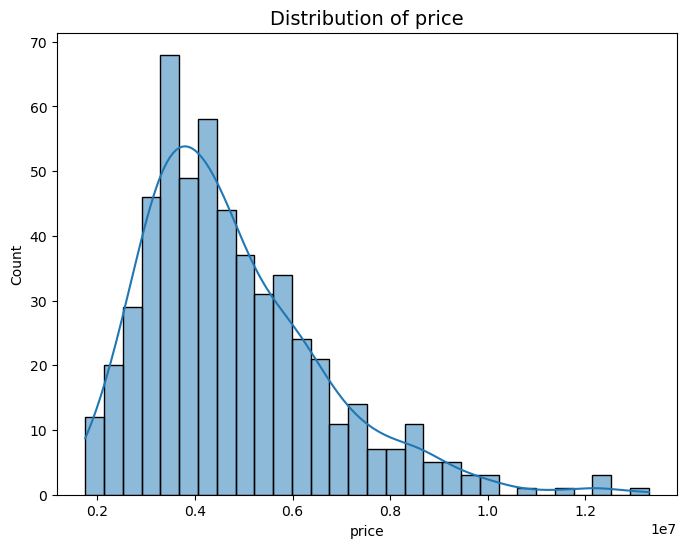

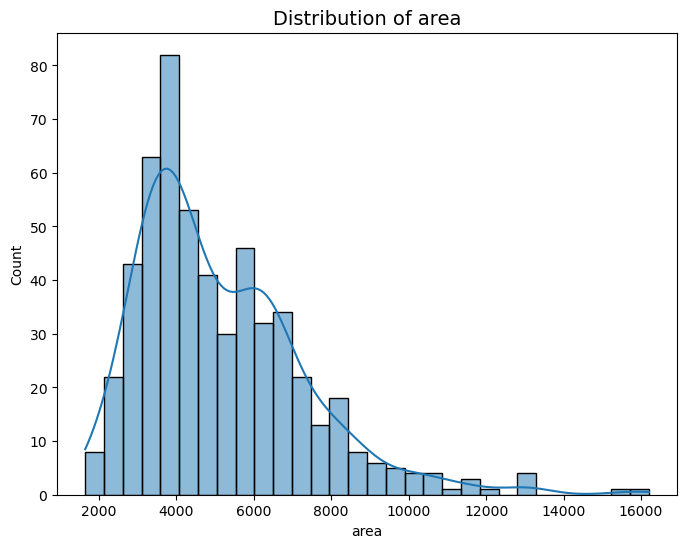

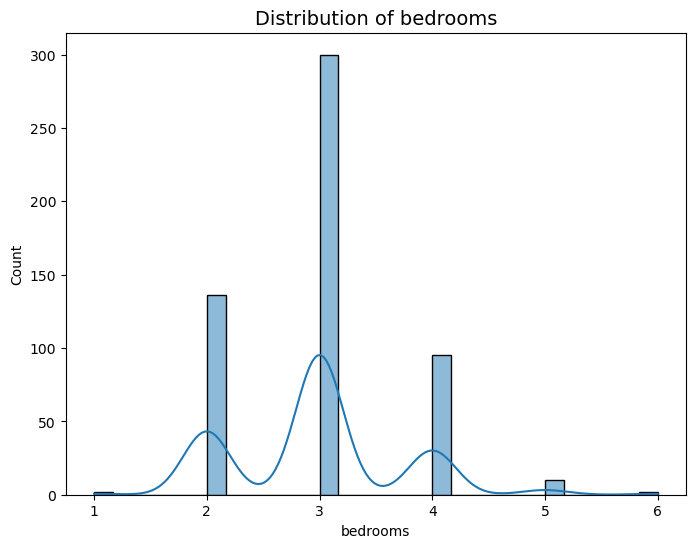

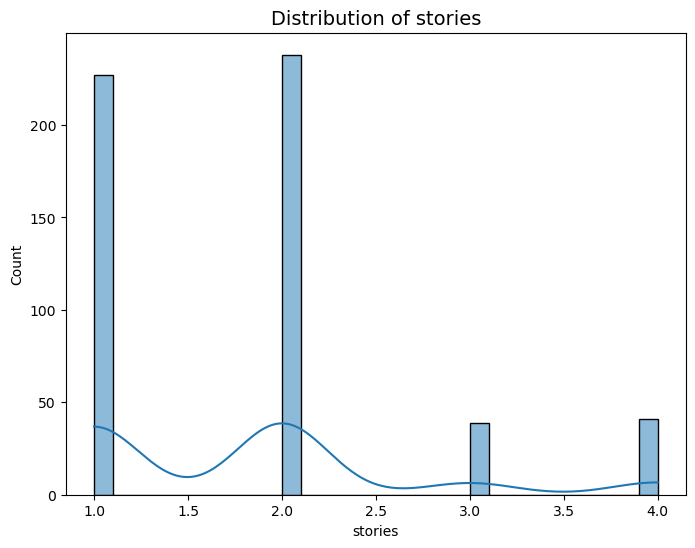

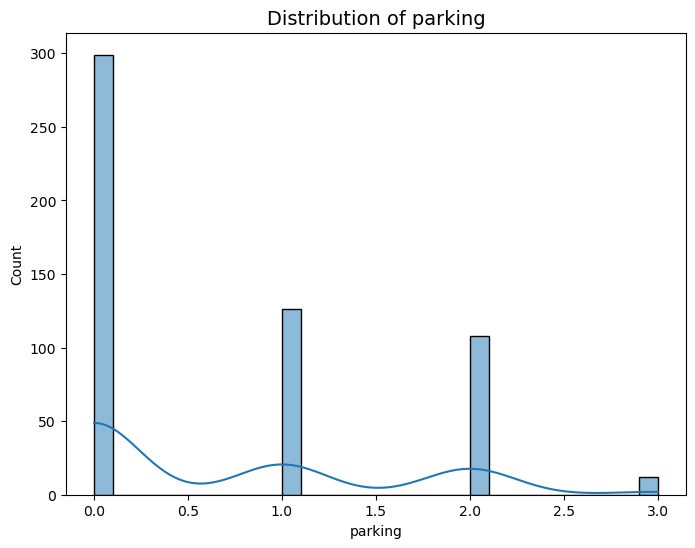

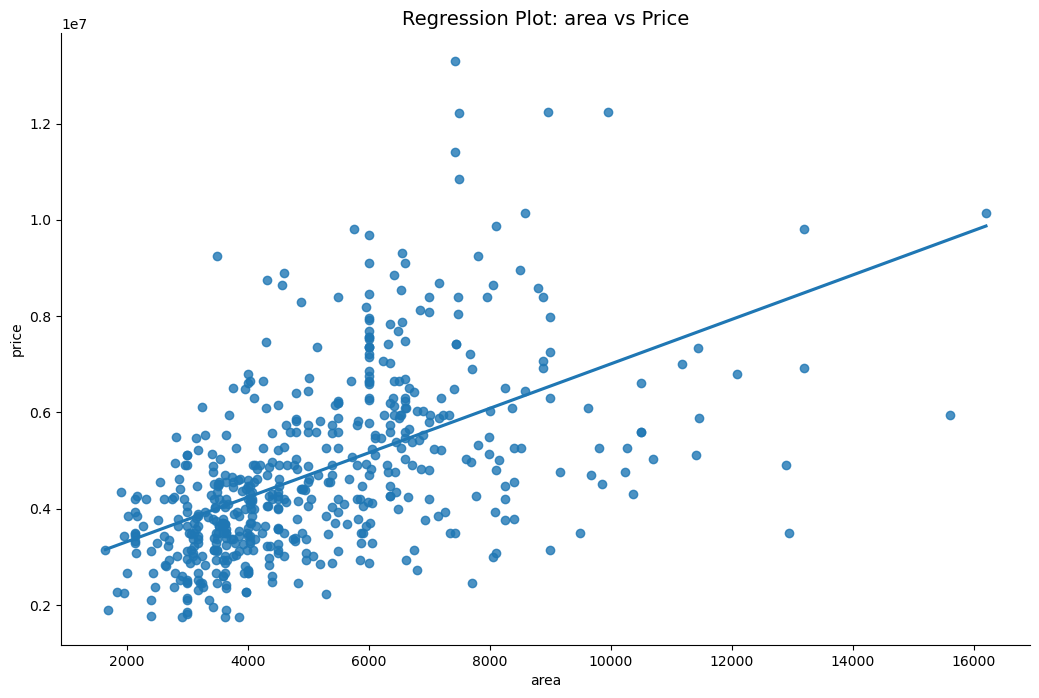

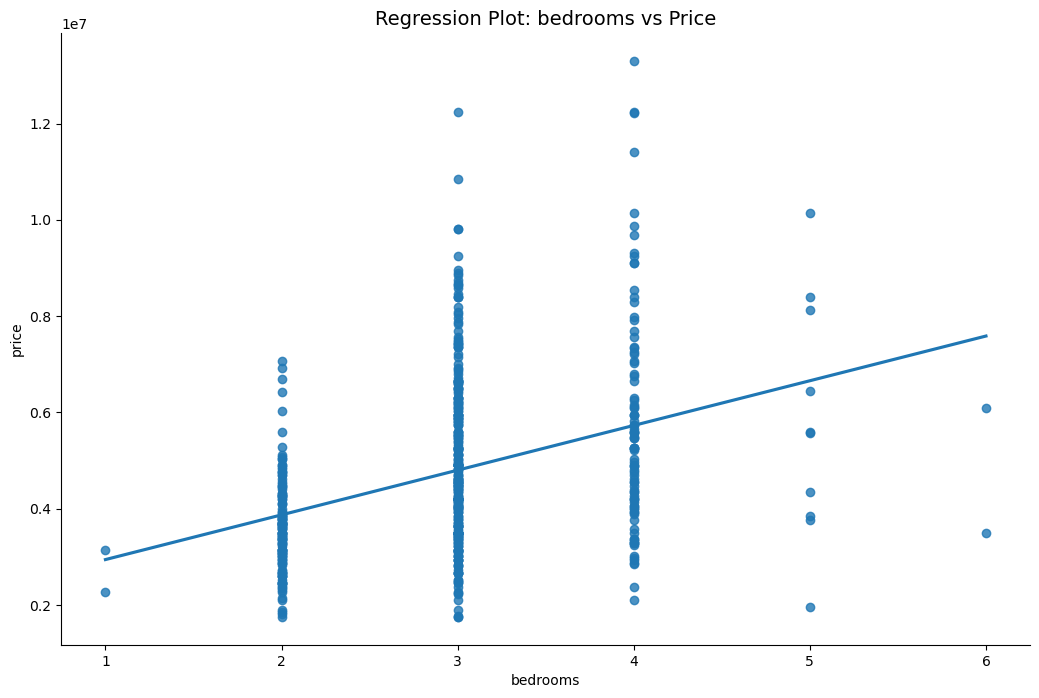

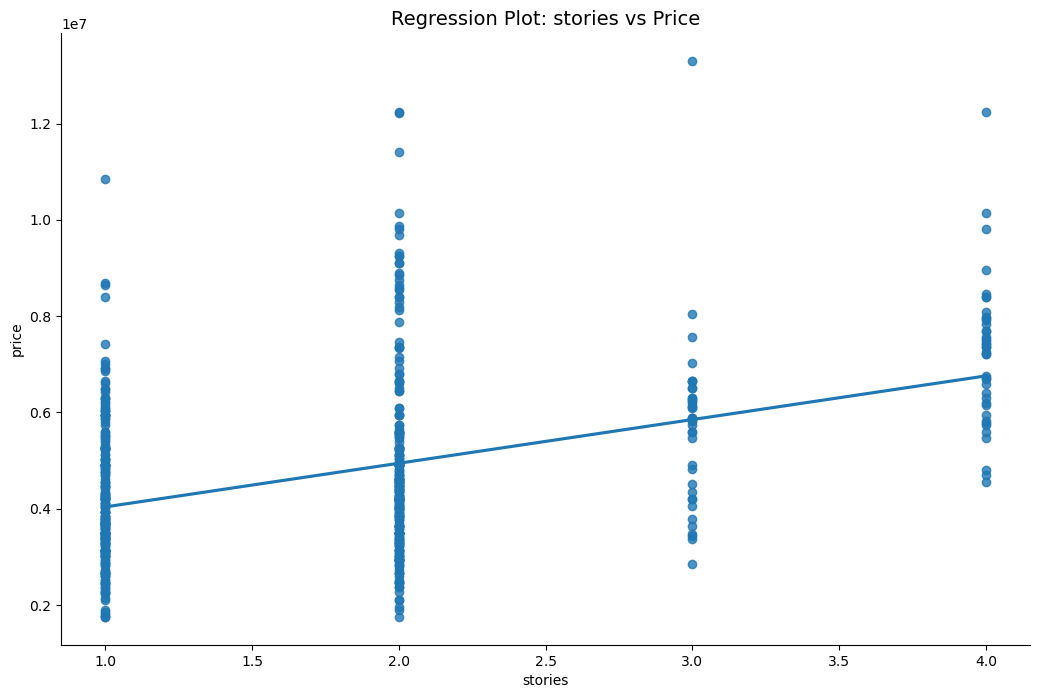

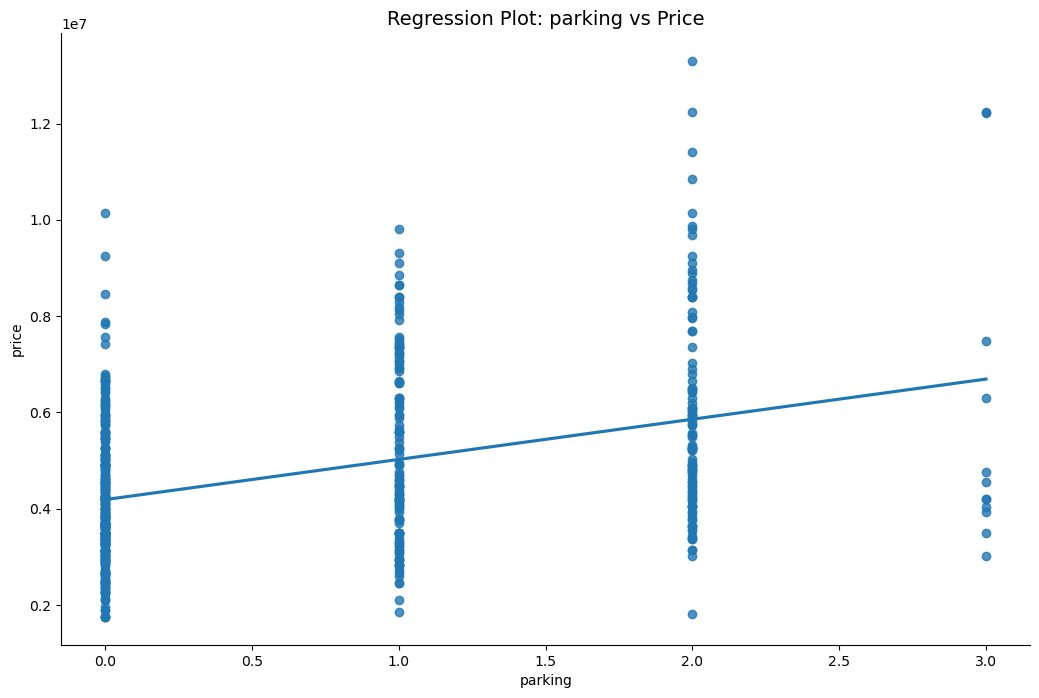

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Subset of numerical data
df_num = pd.DataFrame(df, columns=['price', 'area', 'bedrooms', 'stories', 'parking'])

# Heatmap of Correlations
plt.figure(figsize=(10, 8))
hm_corr = sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Heatmap of Covariance
plt.figure(figsize=(10, 8))
hm_cov = sns.heatmap(df_num.cov(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Heatmap', fontsize=16)
plt.show()

# Pairplot to observe relationships and distributions
sns.pairplot(df_num, diag_kind='kde', markers='+')
plt.title('Pairwise Relationships and Distributions')
plt.show()

# Distplot for each feature
for col in df_num.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_num[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.show()

# Regression Plots
for col in df_num.columns:
    if col != 'price':
        sns.lmplot(x=col, y='price', data=df, height=7, aspect=1.5, ci=None)
        plt.title(f'Regression Plot: {col} vs Price', fontsize=14)
        plt.show()




In [9]:
df = pd.get_dummies(df, columns=['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning',	'prefarea',	'furnishingstatus'])

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False


Polynomial Regression - MSE: 1904199648543.0261, R-squared: 0.6232717015033241


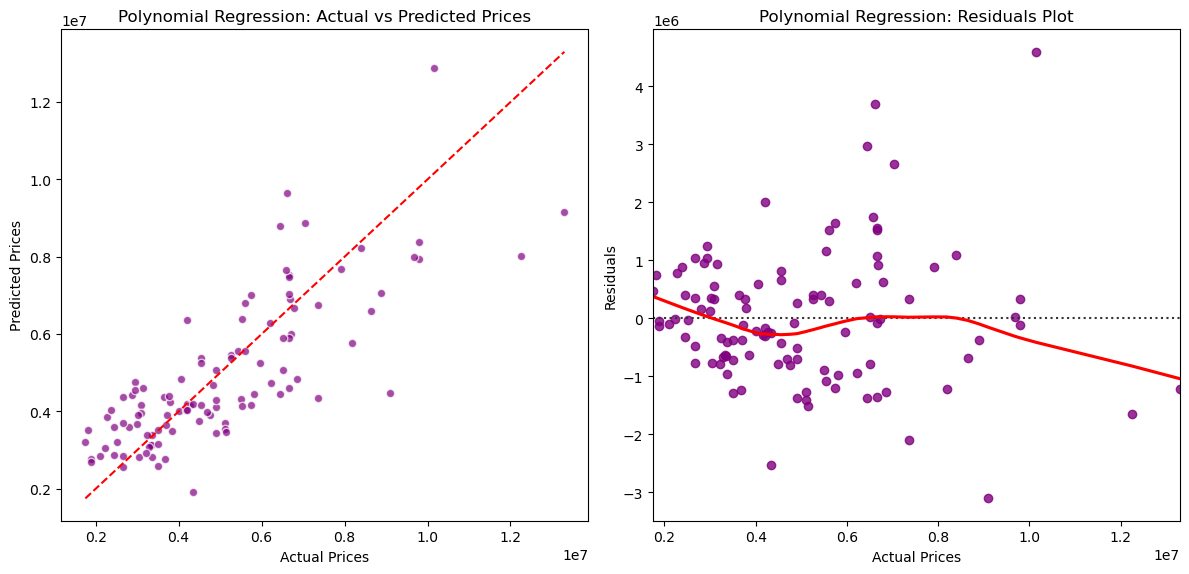

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.335e+14, tolerance: 1.344e+11
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.02099e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Lasso Regression - MSE: 1957121328729.9883, R-squared: 0.6128016362737281
Ridge Regression - MSE: 1880276767177.3218, R-squared: 0.6280046224441169


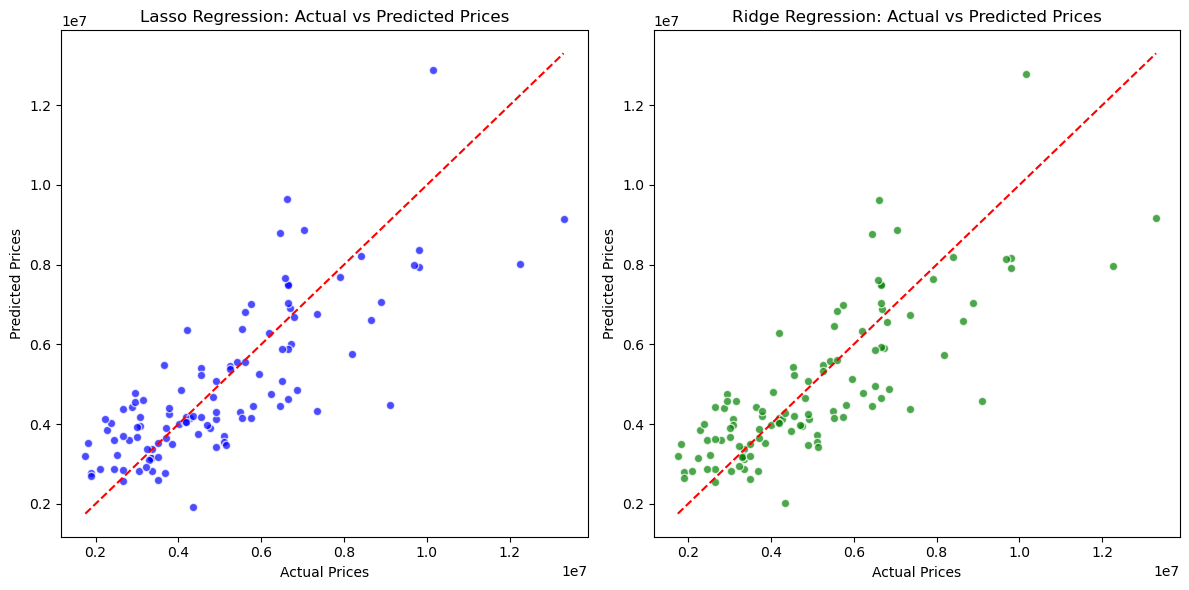

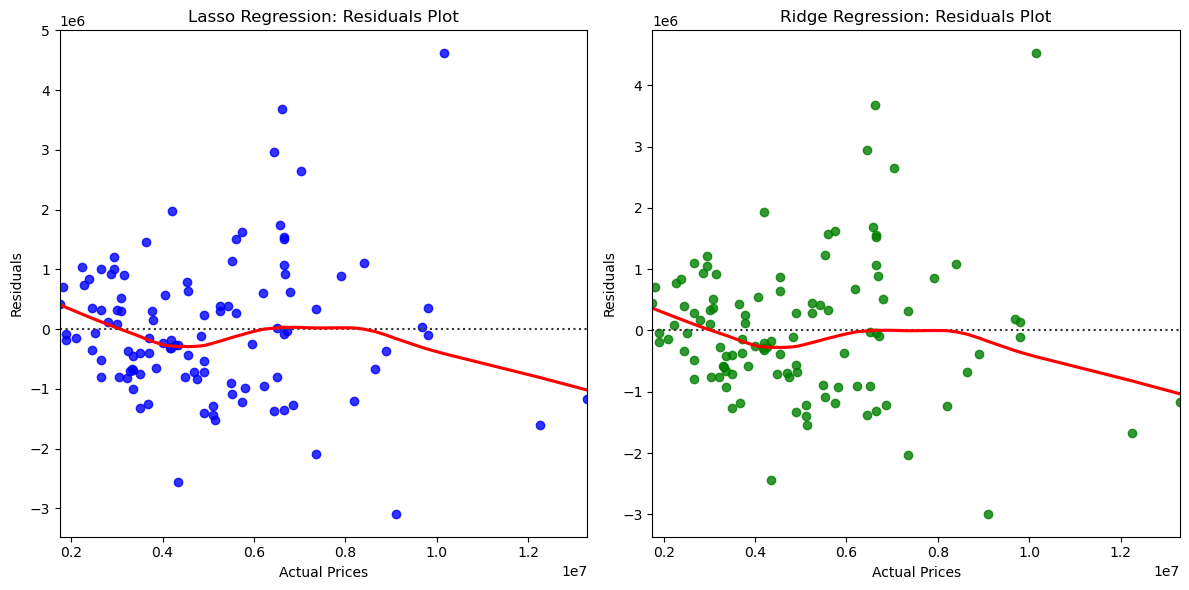

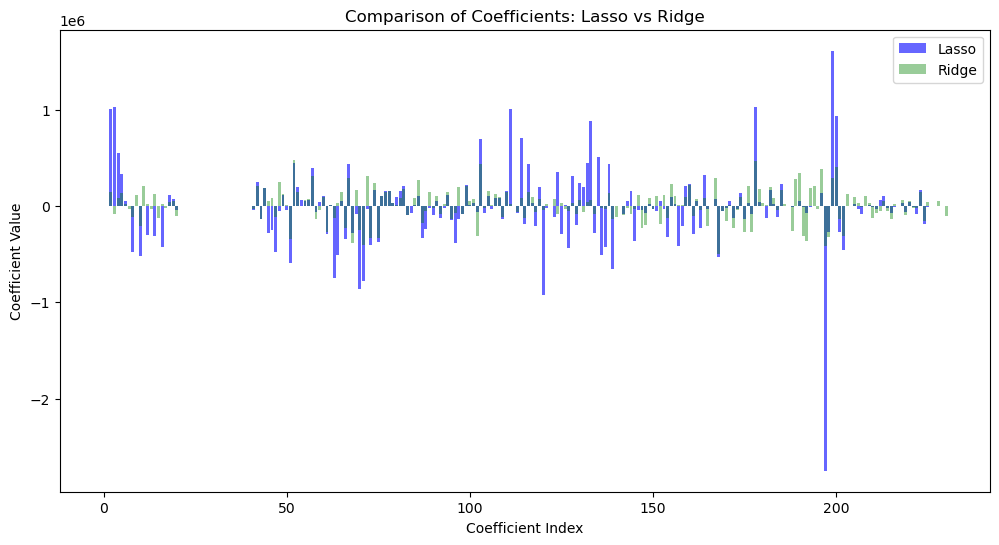

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# 0. Handle Missing Data
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 1. Split the data into training and testing sets (80-20 split)
X = df_imputed.drop('price', axis=1)
y = df_imputed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Polynomial Feature Transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Polynomial Regression

# Fit the model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)
y_pred_poly = poly_reg_model.predict(X_test_poly)

# Model Evaluation
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - MSE: {mse_poly}, R-squared: {r2_poly}")

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_poly, color='purple', edgecolor='w', alpha=0.7)
plt.title('Polynomial Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.subplot(1, 2, 2)
sns.residplot(x=y_test, y=y_pred_poly - y_test, lowess=True, color='purple', line_kws={'color': 'red'})
plt.title('Polynomial Regression: Residuals Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()
# 3. Apply L1 (Lasso) and L2 (Ridge) Penalty
# Lasso Regression (L1 penalty)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)

# Ridge Regression (L2 penalty)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)

# 4. Model Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Lasso Regression - MSE: {mse_lasso}, R-squared: {r2_lasso}")
print(f"Ridge Regression - MSE: {mse_ridge}, R-squared: {r2_ridge}")

# 5. Advanced Visualization
# Plot 1: Actual vs Predicted prices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, color='blue', edgecolor='w', alpha=0.7)
plt.title('Lasso Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', edgecolor='w', alpha=0.7)
plt.title('Ridge Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.tight_layout()
plt.show()

# Plot 2: Residuals Plot (Errors)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.residplot(x=y_test, y=y_pred_lasso - y_test, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Lasso Regression: Residuals Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.residplot(x=y_test, y=y_pred_ridge - y_test, lowess=True, color='green', line_kws={'color': 'red'})
plt.title('Ridge Regression: Residuals Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


# Plot 3: Coefficients of Lasso vs Ridge
plt.figure(figsize=(12, 6))

plt.bar(range(len(lasso.coef_)), lasso.coef_, color='blue', alpha=0.6, label='Lasso')
plt.bar(range(len(ridge.coef_)), ridge.coef_, color='green', alpha=0.4, label='Ridge')
plt.title('Comparison of Coefficients: Lasso vs Ridge')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()
